In [2]:
# импортируем библиотеки
# pandas для работы с табличными данными
import pandas as pd
# numpy для работы с векторами (массивами) и матрицами (N-мерными массивами)
import numpy as np
# matplotlib для рисования графиков
import matplotlib.pyplot as plt
# sklearn для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
# прочитать csv файл в DataFrame df
df = pd.read_csv("kc_house_data.csv")

In [4]:
# тип объекта df - pandas.core.frame.DataFrame
type(df)

pandas.core.frame.DataFrame

In [5]:
# первых 5 строчек нашего DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [1]:
# название колонок, типы данных в колонках, количество строк и т.п.
df.info()

NameError: name 'df' is not defined

Данные взяты из https://www.kaggle.com/harlfoxem/housesalesprediction  
  
Описание колонок:  
id - *a notation for a house*  
date - *date house was sold*  
price - *price is prediction target*  
bedrooms - *number of Bedrooms/House*  
bathrooms - *number of bathrooms/bedrooms*  
sqft_living - *square footage of the home*  
sqft_lot - *square footage of the lot*  
floors - *total floors (levels) in house*  
waterfront - *house which has a view to a waterfront*  
view - *has been viewed*  
condition - *how good the condition is ( Overall )*  
grade - *overall grade given to the housing unit, based on King County grading system*  
sqft_above - *square footage of house apart from basement*  
sqft_basement - *square footage of the basement*  
yr_built - *built Year*  
yr_renovated - *year when house was renovated*  
zipcode - *zip*  
lat - *latitude coordinate*  
long - *longitude coordinate*  
sqft_living15 - *living room area in 2015(implies-- some renovations)*  
sqft_lot15 - *lotSize area in 2015(implies-- some renovations)*  

In [6]:
# список интересующих нас колонок (для начала)
interesting_columns = ['sqft_living', 'condition', 'price']

In [7]:
# упрощенный DataFrame - выборка по колонкам из исходного
simple_dataset = df[interesting_columns]

In [8]:
simple_dataset.head()

,sqft_living,condition,price
0,1180,3,221900.0
1,2570,3,538000.0
2,770,3,180000.0
3,1960,5,604000.0
4,1680,3,510000.0


In [9]:
# это выражение может дать false positive warning
simple_dataset.price_per_ft = simple_dataset.price / simple_dataset.sqft_living

In [10]:
simple_dataset.head()

,sqft_living,condition,price
0,1180,3,221900.0
1,2570,3,538000.0
2,770,3,180000.0
3,1960,5,604000.0
4,1680,3,510000.0


In [11]:
# метод describe дает набор стандартных статистик по колонкам
simple_dataset.describe()

,sqft_living,condition,price
count,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,3.409430,5.400881e+05
std,918.440897,0.650743,3.671272e+05
min,290.000000,1.000000,7.500000e+04
25%,1427.000000,3.000000,3.219500e+05
50%,1910.000000,3.000000,4.500000e+05
75%,2550.000000,4.000000,6.450000e+05
max,13540.000000,5.000000,7.700000e+06


Нарисуем наш data set в 2-х картинках:  
1) Зависимость цены продажи лота от жилой площади  
2) Зависимость цены продажи лота от состояния лота  

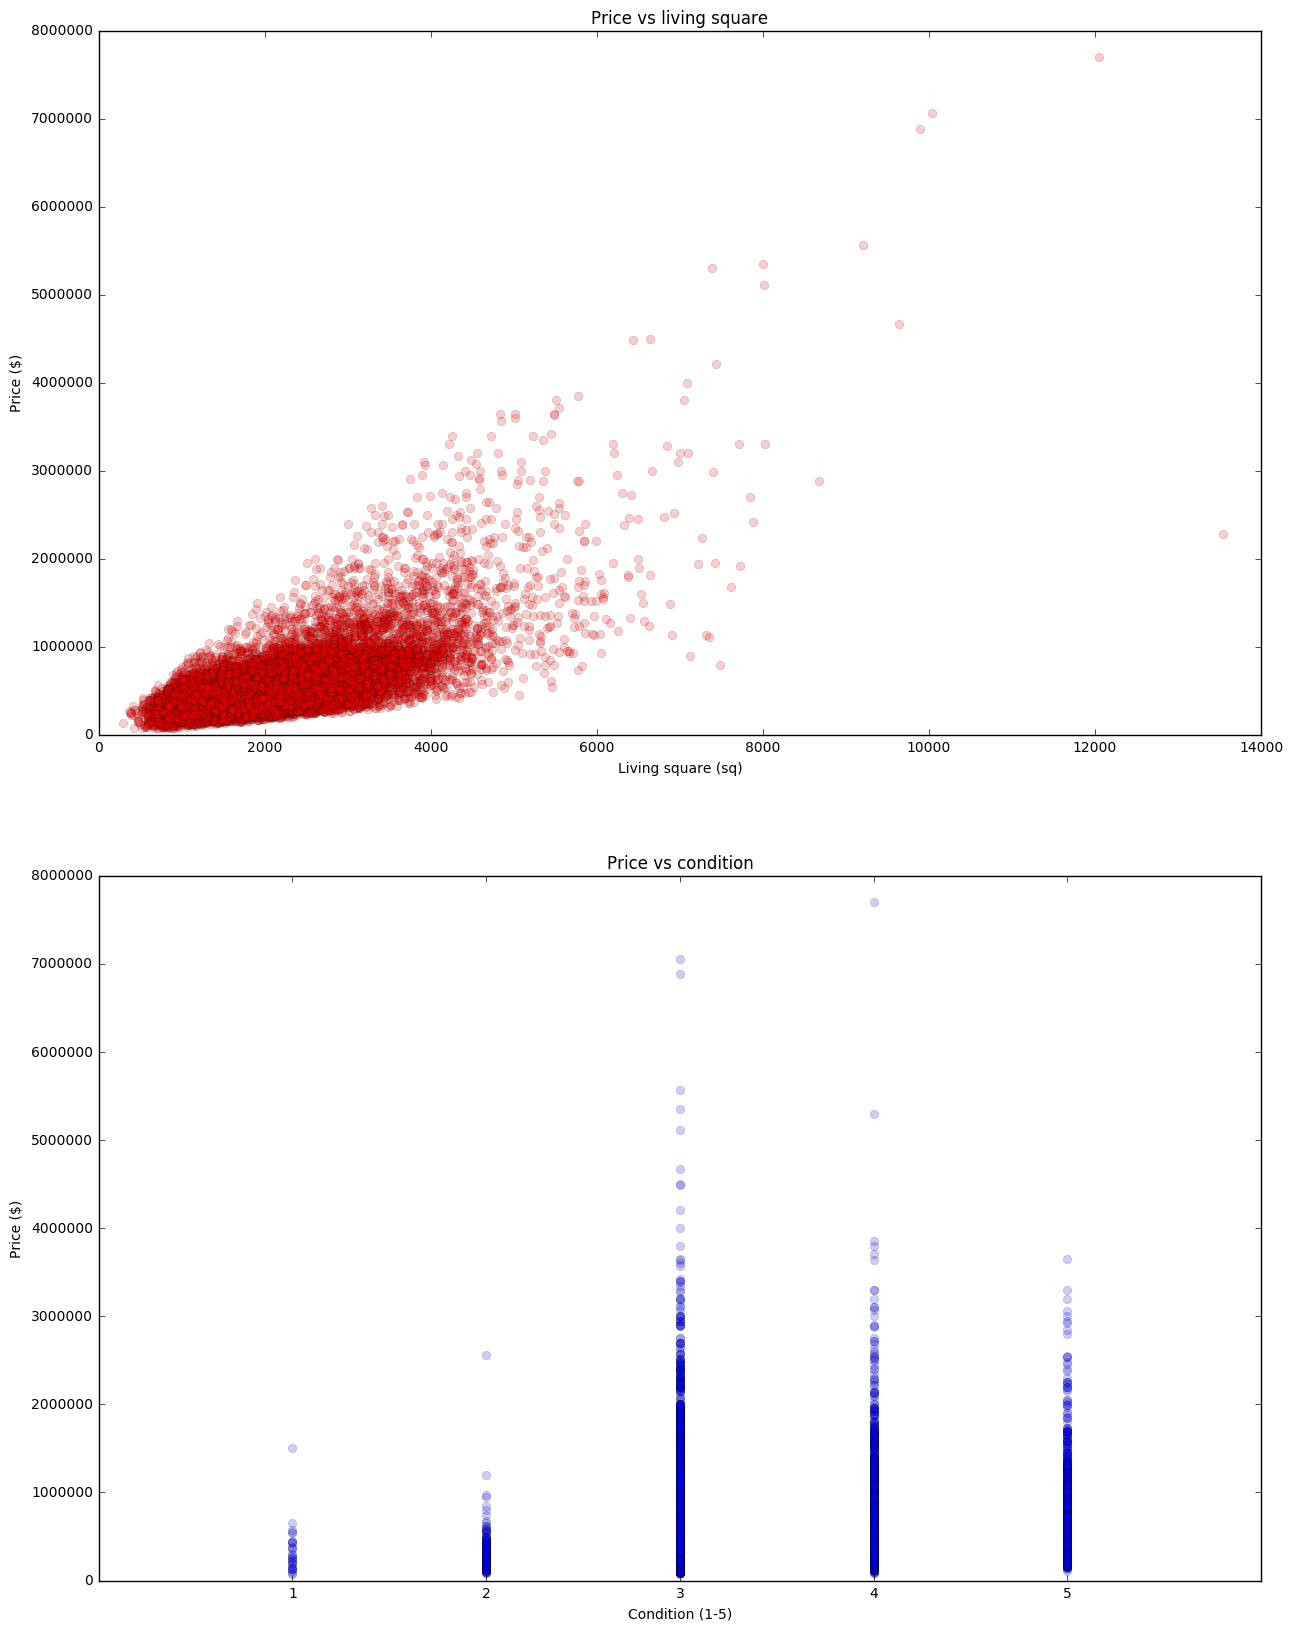

In [12]:
# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')
plt.plot(simple_dataset.sqft_living, simple_dataset.price, 'ro', alpha=0.2)
plt.ylabel('Price ($)')
plt.xlabel('Living square (sq)')

plt.subplot(2,1,2)
plt.title('Price vs condition')
plt.plot(simple_dataset.condition, simple_dataset.price, 'bo', alpha=0.2)
plt.xlim(0,6)
plt.xticks([1,2,3,4,5])
plt.ylabel('Price ($)')
plt.xlabel('Condition (1-5)')

# Show result on screen
plt.show()

In [13]:
# сколько и каких почтовых индексов в наборе данных
df.zipcode.value_counts().head()

98103    602
98038    590
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

https://www.unitedstateszipcodes.org/98103/

In [14]:
# посчитаем среднюю цену по каждому почтовому индексу и отсортируем по возрастанию
averaged_by_zipcodes = df.groupby(['zipcode'], as_index=False).price.agg({'mean_price': np.mean})\
                        .sort_values(['mean_price'], ascending=True)

In [15]:
# 5 почтовых индексов с самой низкой средней ценой сделки
averaged_by_zipcodes.head()

,zipcode,mean_price
1,98002,234284.035176
64,98168,240328.371747
20,98032,251296.240000
0,98001,280804.690608
61,98148,284908.596491


In [16]:
# 5 почтовых индексов с самой высокой средней ценой сделки
averaged_by_zipcodes.tail()

,zipcode,mean_price
41,98102,9.012583e+05
48,98112,1.095499e+06
25,98040,1.194230e+06
3,98004,1.355927e+06
24,98039,2.160607e+06


In [17]:
# упрощенный DataFrame - выборка по колонкам из исходного с инексами
simple_dataset_with_zip = df[['sqft_living', 'condition', 'zipcode', 'price']]

In [18]:
# все сделки с самым "дешевым" индексом 
cheap = simple_dataset_with_zip[simple_dataset_with_zip.zipcode == 98002]
# все сделки с самым "дорогим" индексом 
expensive = simple_dataset_with_zip[simple_dataset_with_zip.zipcode == 98039]

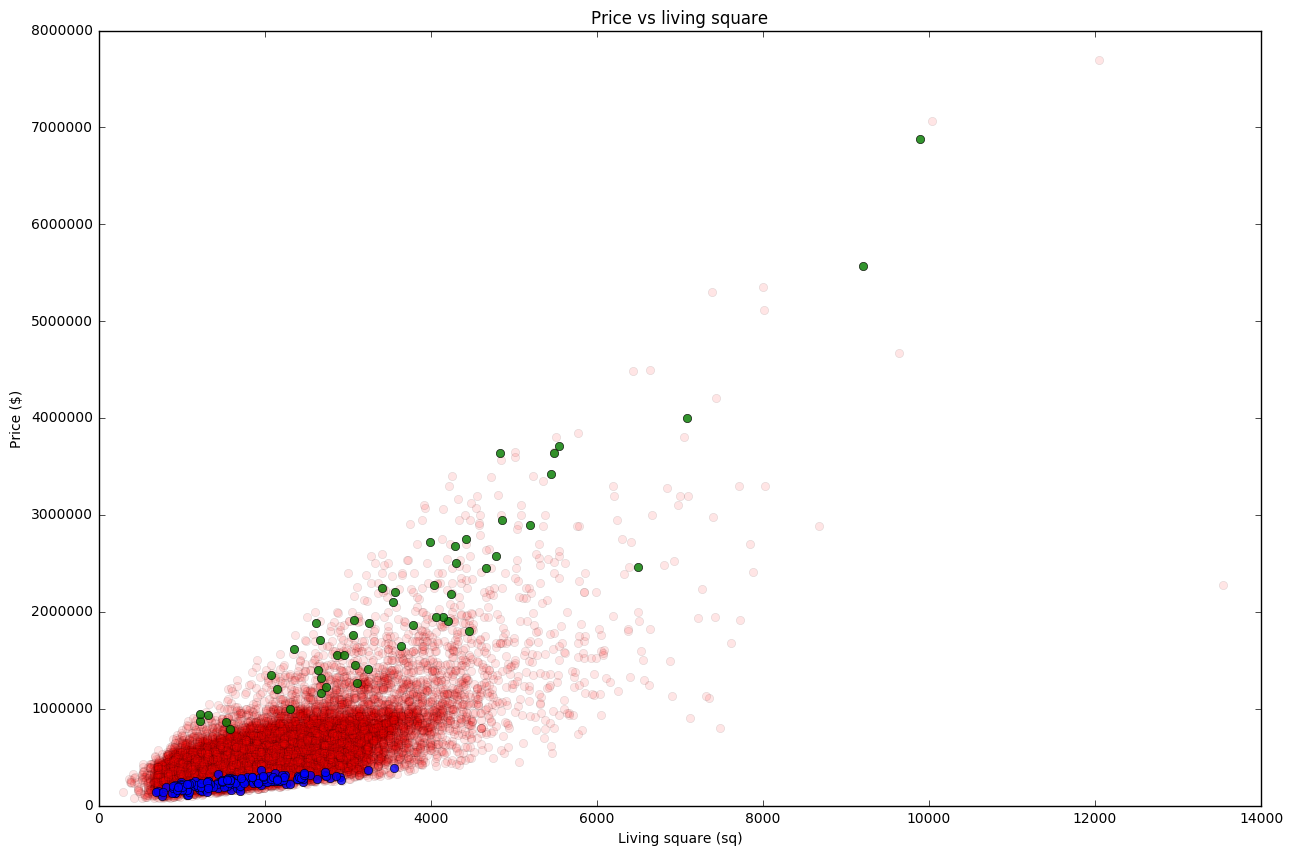

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
plt.title('Price vs living square')
plt.plot(simple_dataset.sqft_living, simple_dataset.price, 'ro', alpha=0.1)
plt.plot(cheap.sqft_living, cheap.price, 'bo', alpha=0.8)
plt.plot(expensive.sqft_living, expensive.price, 'go', alpha=0.8)
plt.ylabel('Price ($)')
plt.xlabel('Living square (sq)')

# Show result on screen
plt.show()

Выше - примеры того, как можно незамысловато исследовать любой набор данных.  
Ниже - начнем заниматься алгоритмами машинного обучения.

In [20]:
# Упростим наш набор данных до жилья в самом дешевом районе
X_train, X_test, y_train, y_test = \
    train_test_split(cheap[['sqft_living']], cheap[['price']], test_size=0.33, random_state=42)

In [21]:
# обучающая выборка - та, на которой мы будем обучать наш регрессор
# X - набор признаков, y - набор ответов
len(X_train), len(y_train)

(133, 133)

In [22]:
# тестовая выборка - та, на которой мы будем проверять наш регрессор
len(X_test), len(y_test)

(66, 66)

На картинке ниже наши данные и вопрос, на который должна отвечать регрессионная модель:  
"Какой должна быть цена сделки с домом заданной площади?"

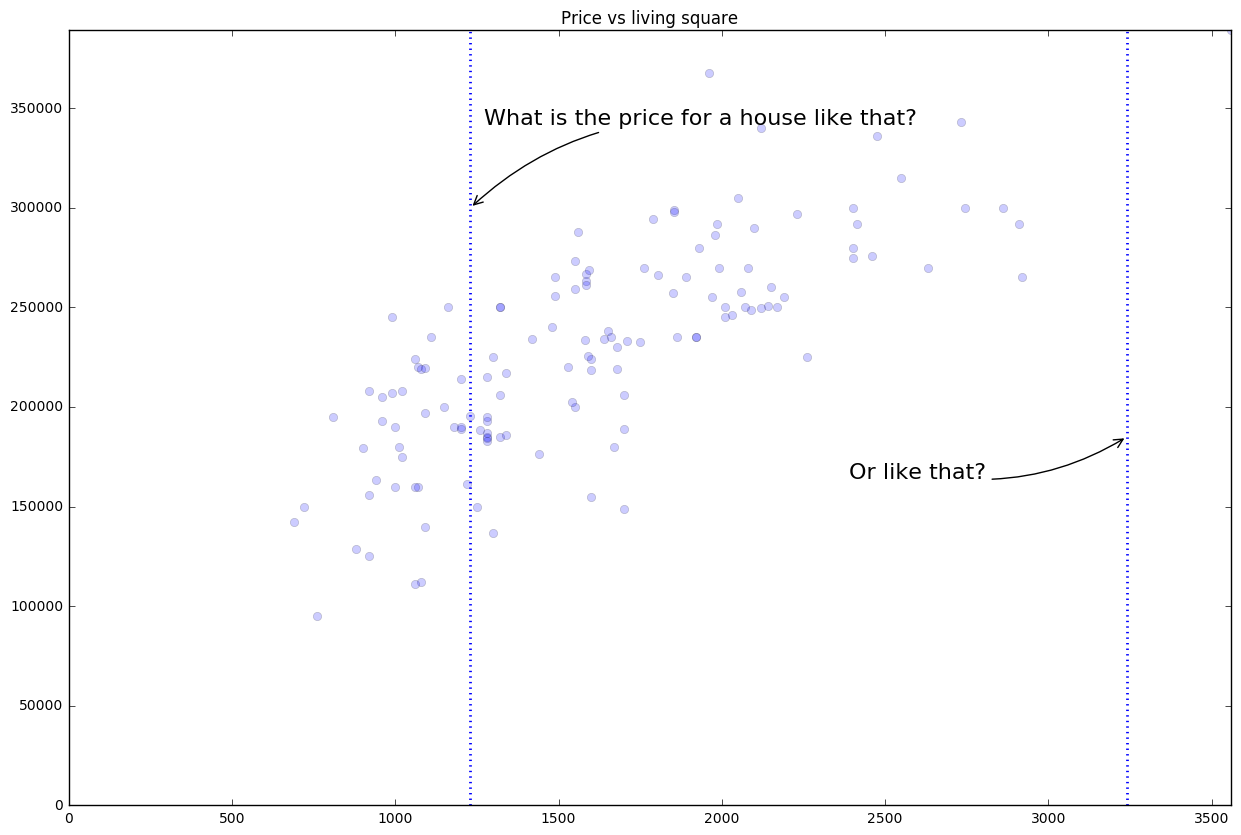

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(1,1,1)
plt.title('Price vs living square')
plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
#plt.plot(X_test.sqft_living, y_test.price, 'ro', alpha=0.2)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

plt.annotate(r'What is the price for a house like that?',
             xy=(X_test.sqft_living.iloc[0], y_test.price.iloc[0]*1.5),
             xytext=(+10, +60), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([X_test.sqft_living.iloc[0], X_test.sqft_living.iloc[0]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")

plt.annotate(r'Or like that?',
             xy=(X_test.sqft_living.iloc[1], y_test.price.iloc[1]*0.5),
             xytext=(-200, -30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([X_test.sqft_living.iloc[1], X_test.sqft_living.iloc[1]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")

# Show result on screen
plt.show()

Самый простой ответ даст наивная модель, константный регрессор, который на любые входные x (любую площадь) будет всегда отвечать среднюю цену по всем объектам (сделкам) в обучающей выборке.

In [24]:
# усредненный ответ в обучающей выборке
int(y_train.price.mean())

228826

In [25]:
# создадим массив ответов на обучающей выборке, для каждого X предскажем такю среднюю цену
y_pred_naive = np.ones(len(X_train)) * y_train.price.mean()

Нарисуем наш наивный регрессор и ошибки на некоторых точках из обучающей выборки. Ошибкой будем считать разность между предсказанным значением -- ответом нашего наивного регрессора на этой точке -- и фактическим значением, которое нам известно.

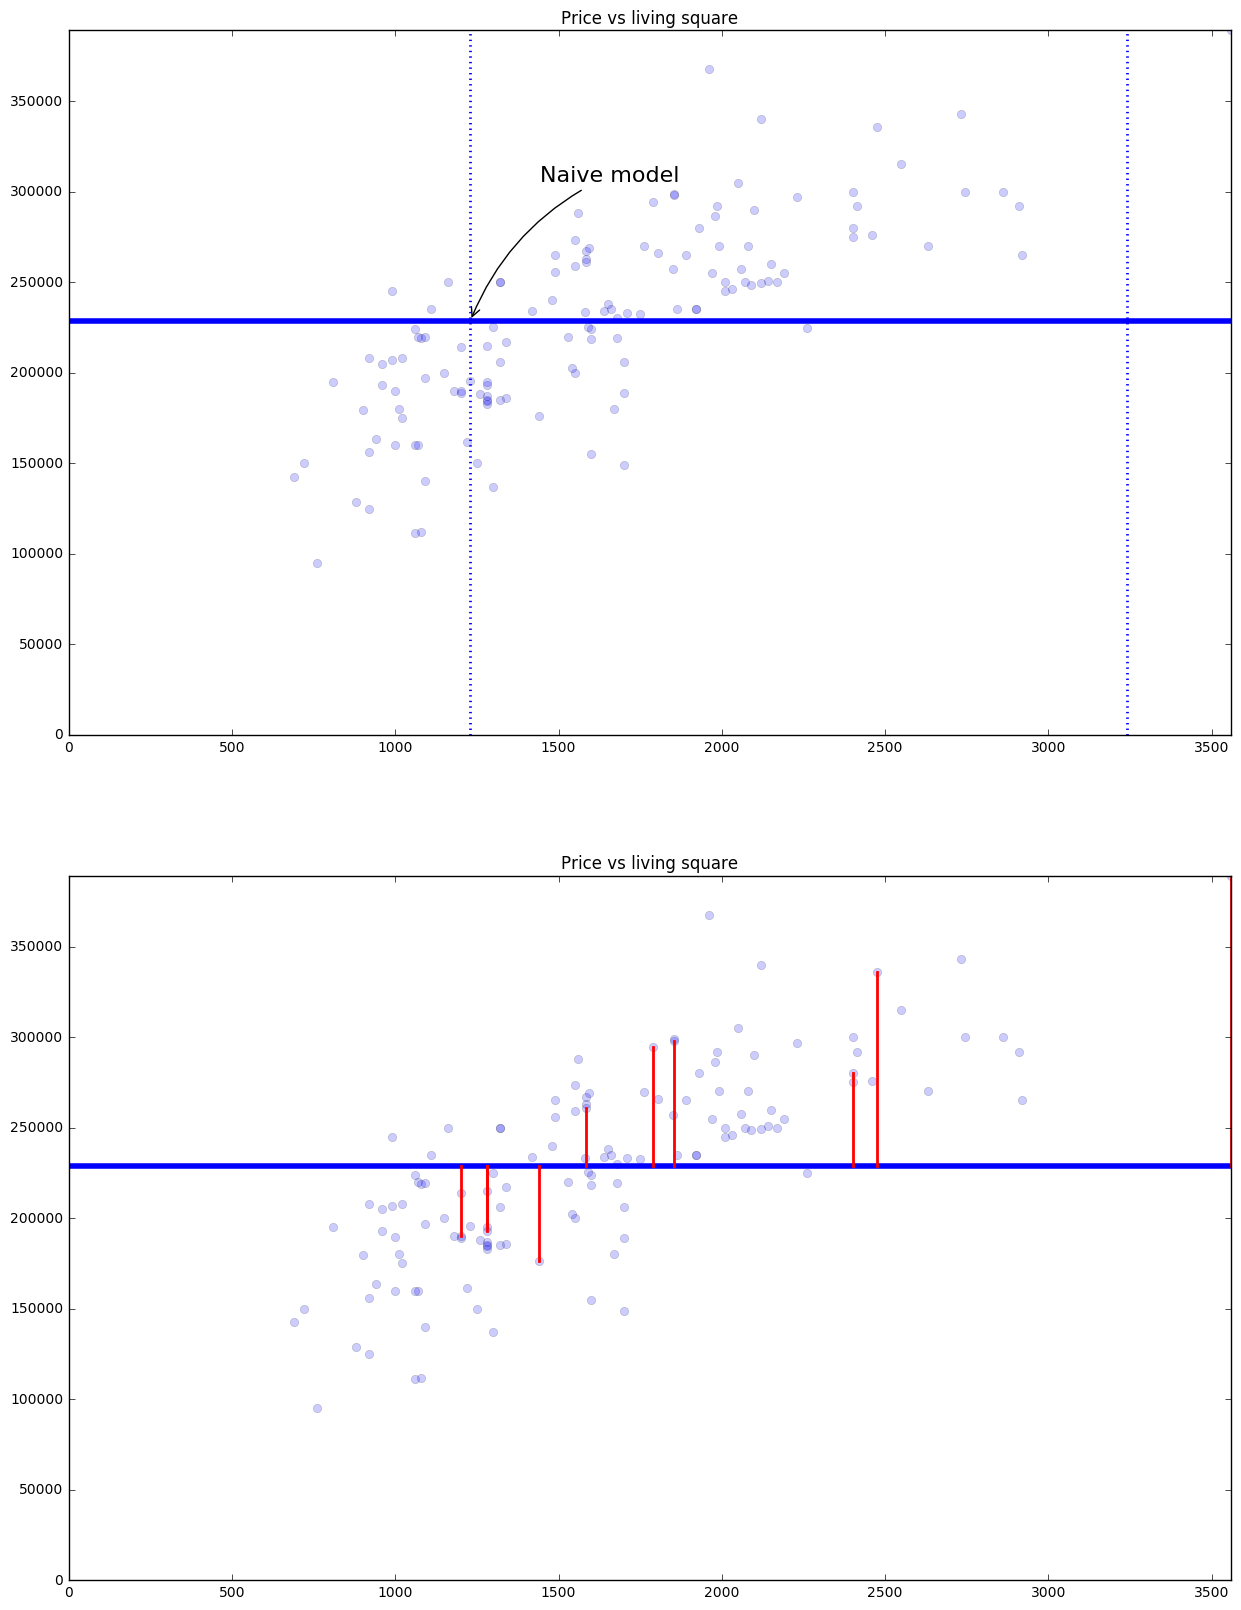

In [26]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')
plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(np.array([0, cheap.sqft_living.max()]), y_pred_naive[0:2], 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

plt.annotate(r'Naive model',
             xy=(X_test.sqft_living.iloc[0], y_train.price.mean()),
             xytext=(+50, +100), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([X_test.sqft_living.iloc[0], X_test.sqft_living.iloc[0]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")

plt.plot([X_test.sqft_living.iloc[1], X_test.sqft_living.iloc[1]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")


plt.subplot(2,1,2)
plt.title('Price vs living square')
plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(np.array([0, cheap.sqft_living.max()]), y_pred_naive[0:2], 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

for i in range(0,10):
    plt.plot([X_train.sqft_living.iloc[-i], X_train.sqft_living.iloc[-i]],[y_train.price.iloc[-i], y_pred_naive[0]], color ='r', linewidth=2, linestyle="-")

# Show result on screen
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
# средняя абсолютная ошибка - усредненная сумма модулей всех ошибок
mean_absolute_error(y_train, y_pred_naive)

42927.974108202841

Теперь обучим линейный регрессор, который даст нам модель по-лучше.

In [29]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred_linear = reg.predict(X_train)

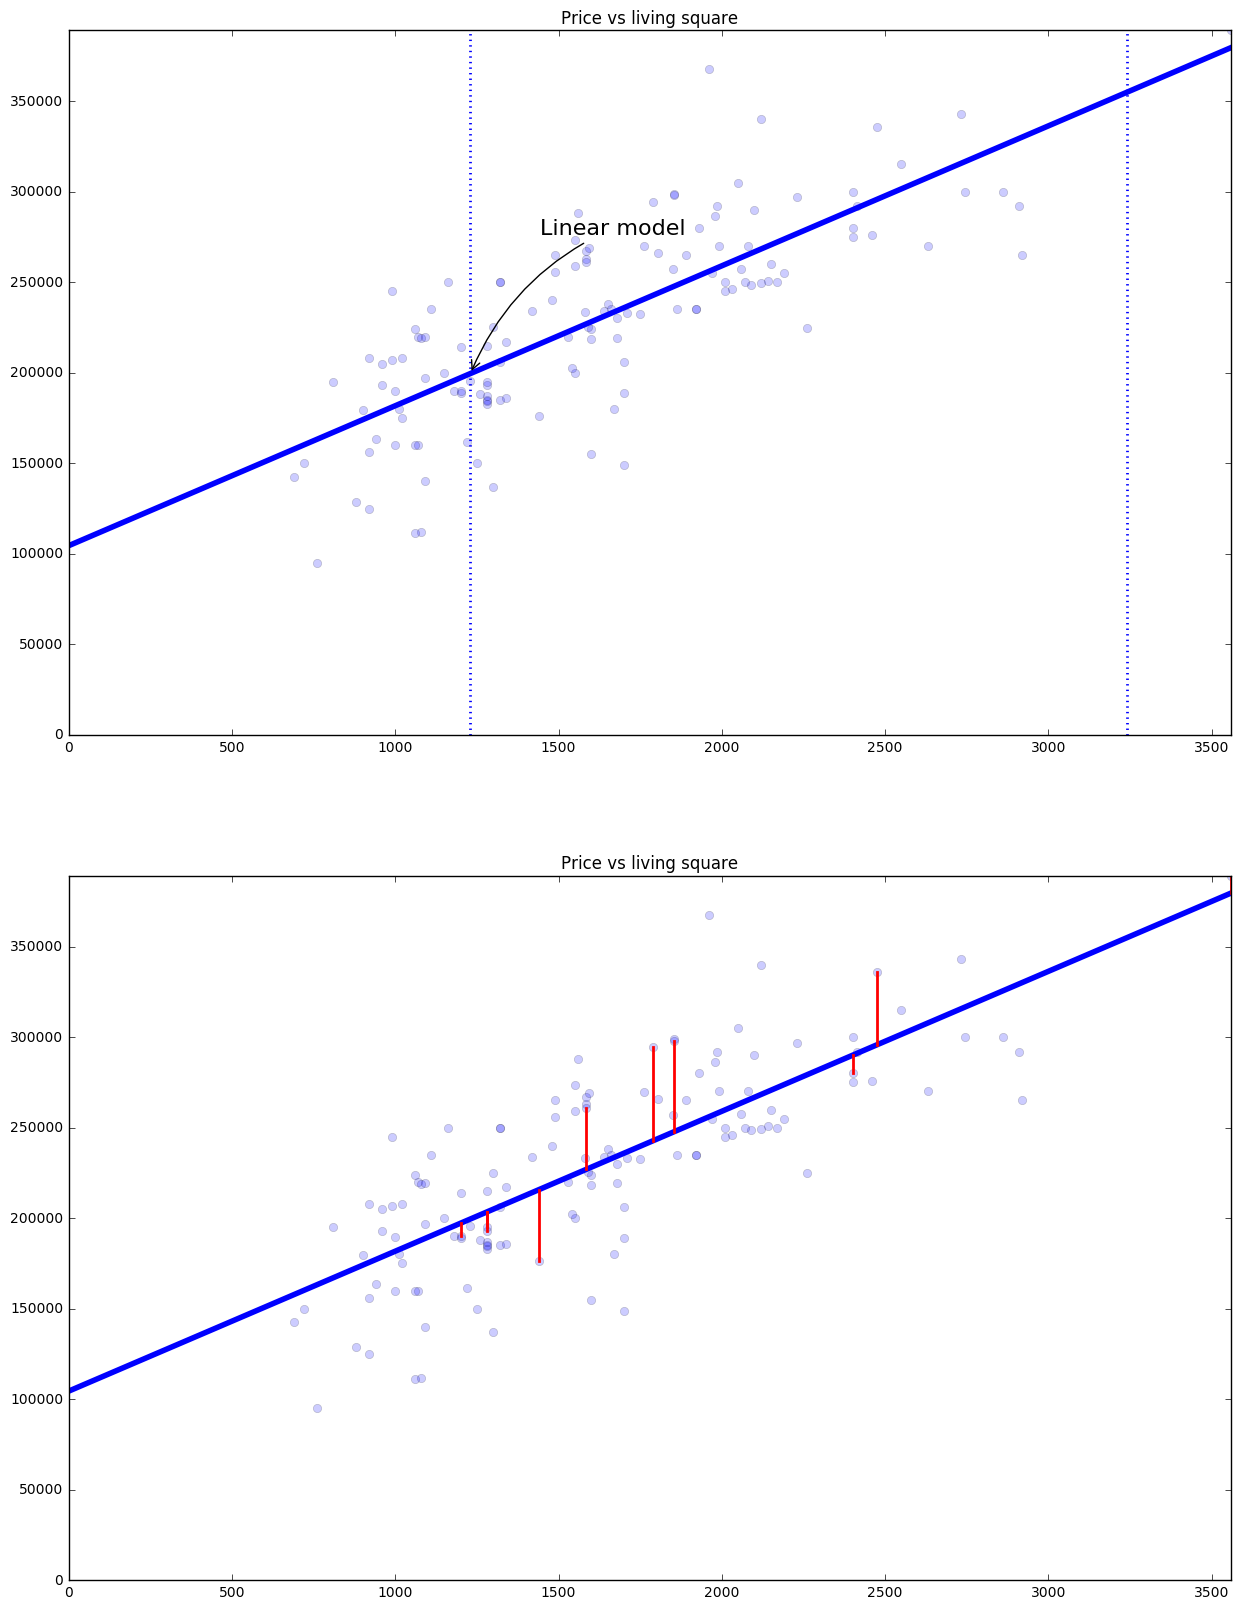

In [31]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')
plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(np.array([0, cheap.sqft_living.max()]).transpose(), reg.predict(np.array([[0], [cheap.sqft_living.max()]])), 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

plt.annotate(r'Linear model',
             xy=(X_test.sqft_living.iloc[0], reg.predict(X_test.sqft_living.iloc[0])),
             xytext=(+50, +100), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([X_test.sqft_living.iloc[0], X_test.sqft_living.iloc[0]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")

plt.plot([X_test.sqft_living.iloc[1], X_test.sqft_living.iloc[1]],
         [0, cheap.price.max()], color ='b', linewidth=2, linestyle=":")

plt.subplot(2,1,2)
plt.title('Price vs living square')
plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(np.array([0, cheap.sqft_living.max()]).transpose(), reg.predict(np.array([[0], [cheap.sqft_living.max()]])), 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

for i in range(0,10):
    plt.plot([X_train.sqft_living.iloc[-i], X_train.sqft_living.iloc[-i]],[y_train.price.iloc[-i], y_pred_linear[-i]], color ='r', linewidth=2, linestyle="-")

# Show result on screen
plt.show()

In [32]:
# средняя абсолютная ошибка наивной модели
print('Cредняя абсолютная ошибка наивной модели: %d' % mean_absolute_error(y_train, y_pred_naive))
# средняя абсолютная ошибка линейной модели
print('Cредняя абсолютная ошибка линейной модели: %d' % mean_absolute_error(y_train, y_pred_linear))

Cредняя абсолютная ошибка наивной модели: 42927
Cредняя абсолютная ошибка линейной модели: 26520


In [33]:
mean_absolute_error(y_train, y_pred_naive) / mean_absolute_error(y_train, y_pred_linear)

1.6186765601913469

Теперь усложним нашу модель.

In [34]:
X_complex = X_train.copy()

In [35]:
X_complex.head()

,sqft_living
8266,3560
16128,1960
16107,1320
5468,2060
12087,2120


In [36]:
X_complex['x2'] = X_complex.sqft_living ** 2
X_complex['x3'] = X_complex.sqft_living ** 3

In [37]:
reg_complex = linear_model.LinearRegression()
reg_complex.fit(X_complex, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_pred_linear_complex = reg_complex.predict(X_complex)

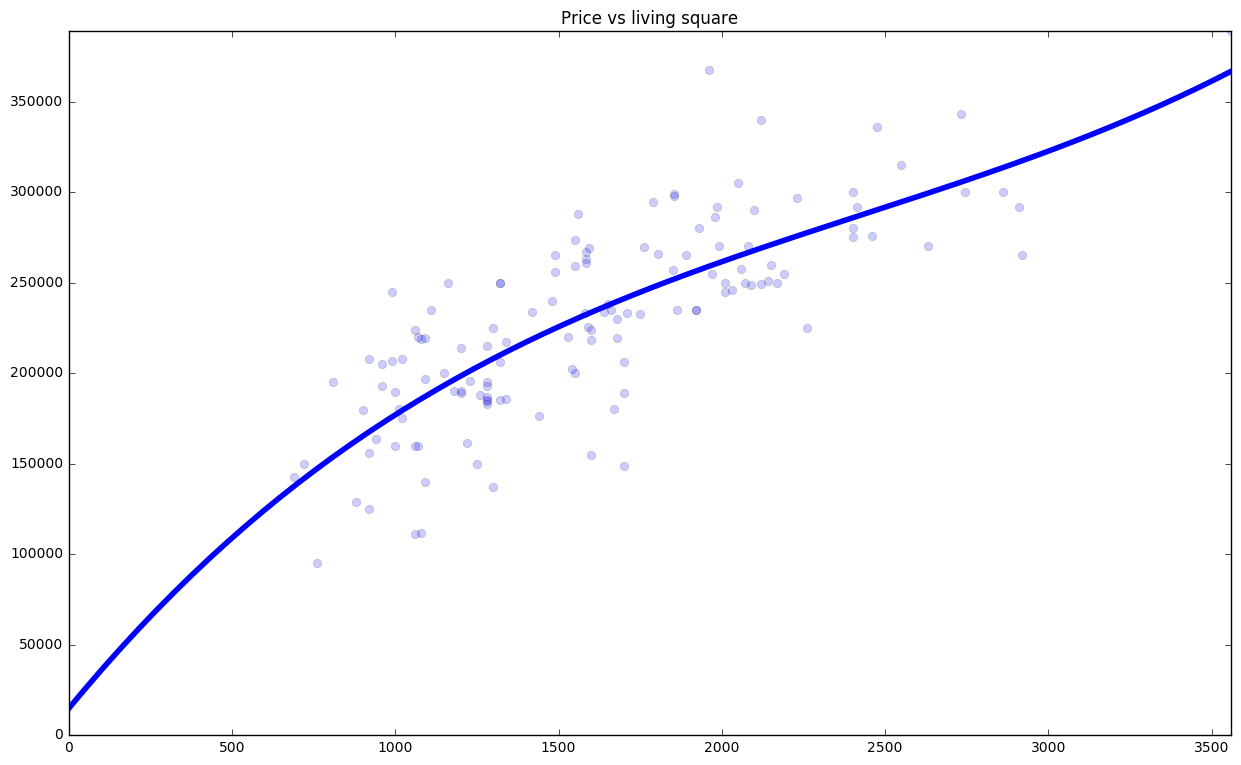

In [39]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')

xs = pd.DataFrame(np.linspace(0, cheap.sqft_living.max(), len(X_complex)), columns=['x1'])
xs['x2'] = xs.x1 ** 2
xs['x3'] = xs.x1 ** 3

ys = reg_complex.predict(xs)

plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(xs.x1, ys, 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

# Show result on screen
plt.show()

In [40]:
# средняя абсолютная ошибка наивной модели
print('Cредняя абсолютная ошибка наивной модели: %d' % mean_absolute_error(y_train, y_pred_naive))
# средняя абсолютная ошибка линейной модели
print('Cредняя абсолютная ошибка линейной модели: %d' % mean_absolute_error(y_train, y_pred_linear))
# средняя абсолютная ошибка полиномиальной модели
print('Cредняя абсолютная ошибка полиномиальной модели: %d' % mean_absolute_error(y_train, y_pred_linear_complex))

Cредняя абсолютная ошибка наивной модели: 42927
Cредняя абсолютная ошибка линейной модели: 26520
Cредняя абсолютная ошибка полиномиальной модели: 26377


In [41]:
# Отношение MAE наивной модели к MAE линейной модели
mean_absolute_error(y_train, y_pred_naive) / mean_absolute_error(y_train, y_pred_linear)

1.6186765601913469

In [42]:
# Отношение MAE линейной модели к MAE усложненной линейной модели (полиномиальной)
mean_absolute_error(y_train, y_pred_linear) / mean_absolute_error(y_train, y_pred_linear_complex)

1.0053999100679654

Рассмотрим другую модель регрессии для этих данных - Nearest Neighbors - ближайшие соседи.

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
reg_nn = KNeighborsRegressor()
reg_nn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [45]:
y_pred_nn = reg_nn.predict(X_train)

In [46]:
print('Cредняя абсолютная ошибка KNN модели: %d' % mean_absolute_error(y_train, y_pred_nn))

Cредняя абсолютная ошибка KNN модели: 23475


In [47]:
# Отношение MAE линейной модели к MAE KNN модели
mean_absolute_error(y_train, y_pred_linear) / mean_absolute_error(y_train, y_pred_nn)

1.1297281840125744

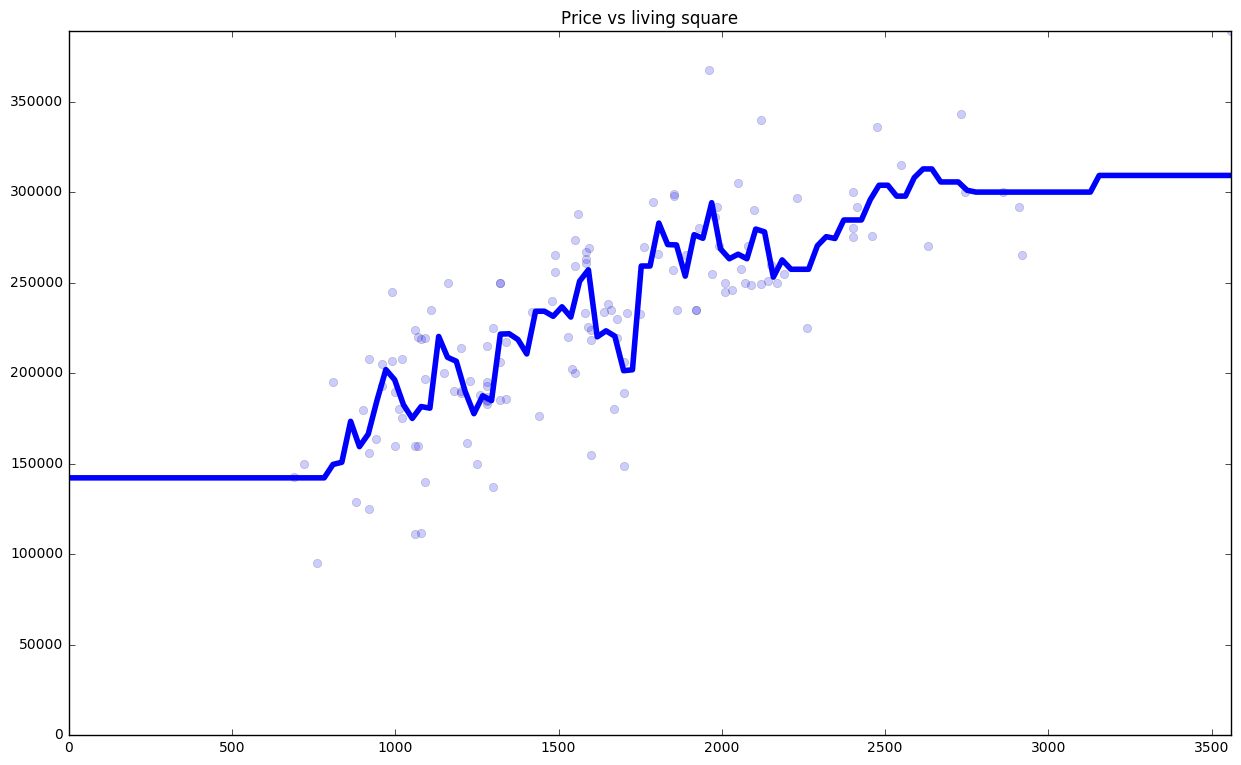

In [48]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')

xs = pd.DataFrame(np.linspace(0, cheap.sqft_living.max(), len(X_train)), columns=['sqft_living'])

ys = reg_nn.predict(xs)

plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(xs.sqft_living, ys, 'b', alpha=1.0, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

# Show result on screen
plt.show()

In [49]:
reg_nn_improved = KNeighborsRegressor(weights='distance')
reg_nn_improved.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [50]:
y_pred_nn_improved = reg_nn_improved.predict(X_train)

In [51]:
print('Cредняя абсолютная ошибка улучшенной KNN модели: %d' % mean_absolute_error(y_train, y_pred_nn_improved))

Cредняя абсолютная ошибка улучшенной KNN модели: 9181


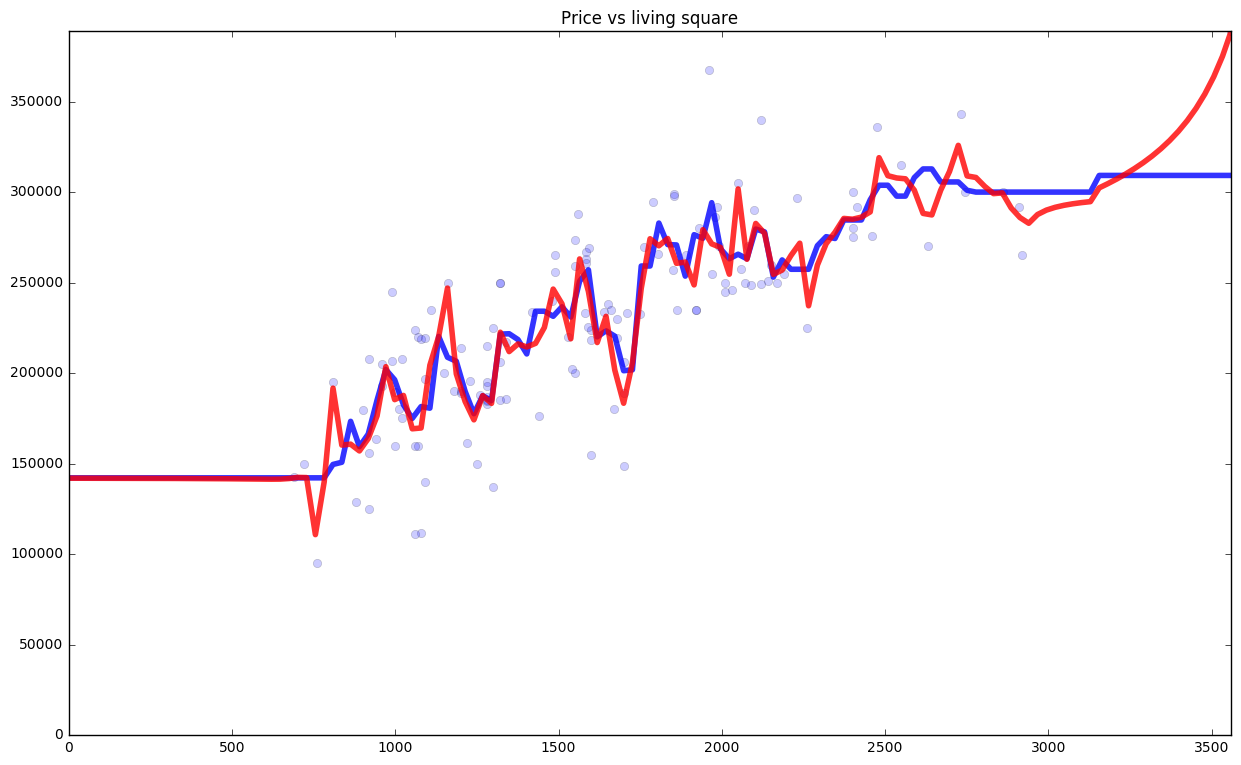

In [52]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.title('Price vs living square')

xs = pd.DataFrame(np.linspace(0, cheap.sqft_living.max(), len(X_train)), columns=['sqft_living'])
ys = reg_nn.predict(xs)
ys_improved = reg_nn_improved.predict(xs)

plt.plot(X_train.sqft_living, y_train.price, 'bo', alpha=0.2)
plt.plot(xs.sqft_living, ys, 'b', alpha=0.8, linewidth=4)
plt.plot(xs.sqft_living, ys_improved, 'r', alpha=0.8, linewidth=4)
plt.xlim(0,cheap.sqft_living.max())
plt.ylim(0,cheap.price.max())

# Show result on screen
plt.show()

На тренировочной выборке:

In [53]:
print('Cредняя абсолютная ошибка наивной модели: \t\t%d' % mean_absolute_error(y_train, y_pred_naive))
print('Cредняя абсолютная ошибка линейной модели: \t\t%d' % mean_absolute_error(y_train, y_pred_linear))
print('Cредняя абсолютная ошибка полиномиальной модели: \t%d' % mean_absolute_error(y_train, y_pred_linear_complex))
print('Cредняя абсолютная ошибка KNN модели: \t\t\t%d' % mean_absolute_error(y_train, y_pred_nn))
print('Cредняя абсолютная ошибка улучшенной KNN модели: \t%d' % mean_absolute_error(y_train, y_pred_nn_improved))

Cредняя абсолютная ошибка наивной модели: 		42927
Cредняя абсолютная ошибка линейной модели: 		26520
Cредняя абсолютная ошибка полиномиальной модели: 	26377
Cредняя абсолютная ошибка KNN модели: 			23475
Cредняя абсолютная ошибка улучшенной KNN модели: 	9181


На тестовой выборке:

In [54]:
X_complex_test = X_test.copy()
X_complex_test['x2'] = X_complex_test.sqft_living ** 2
X_complex_test['x3'] = X_complex_test.sqft_living ** 3

In [55]:
print('Cредняя абсолютная ошибка наивной модели: \t\t%d' % mean_absolute_error(y_test, np.ones(len(X_test)) * y_train.price.mean()))
print('Cредняя абсолютная ошибка линейной модели: \t\t%d' % mean_absolute_error(y_test, reg.predict(X_test)))
print('Cредняя абсолютная ошибка полиномиальной модели: \t%d' % mean_absolute_error(y_test, reg_complex.predict(X_complex_test)))
print('Cредняя абсолютная ошибка KNN модели: \t\t\t%d' % mean_absolute_error(y_test, reg_nn.predict(X_test)))
print('Cредняя абсолютная ошибка улучшенной KNN модели: \t%d' % mean_absolute_error(y_test, reg_nn_improved.predict(X_test)))

Cредняя абсолютная ошибка наивной модели: 		38431
Cредняя абсолютная ошибка линейной модели: 		25303
Cредняя абсолютная ошибка полиномиальной модели: 	23975
Cредняя абсолютная ошибка KNN модели: 			26384
Cредняя абсолютная ошибка улучшенной KNN модели: 	27089


Регрессионные модели ближайших соседей сильно подогнались под обучающую выборку - переобучились и плохо показали себя на тестовой выборке. Вывод: о проблеме переобучения нужно знать, оценивать величину переобучения, бороться с ней. Подробнее о проблеме: http://www.machinelearning.ru/wiki/index.php?title=Переобучение